<a href="https://colab.research.google.com/github/IvanRobotics/BankNote_Detector/blob/main/BankNoteDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/AI_Projects/MLops/BankNoteDetection/BankNote_Authentication.csv'
data = pd.read_csv(path)
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
data.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [ ]:
class_counts = data['class'].value_counts()
print('class 0 count: ', class_counts[0])
print('class 1 count: ', class_counts[1])

class 0 count:  762
class 1 count:  610


In [ ]:
# shuffle the rows, and reset the index in one line
# frac = 1; it will return the entire dataframe in a shuffled order
shuffled_data = data.sample(frac=1, random_state=30).reset_index(drop=True)
shuffled_data.head(10)

,variance,skewness,curtosis,entropy,class
0,-1.46280,-1.5706,2.435700,0.498260,1
1,3.03330,-2.5928,2.318300,0.303000,0
2,-2.94980,-8.2730,10.264600,1.162900,1
3,2.45270,2.9653,0.200210,-0.056479,0
4,4.66890,1.3098,0.055404,1.909000,0
5,0.39559,6.8866,1.058800,-0.675870,0
6,-5.20490,7.2590,0.070827,-7.300400,1
7,-2.43650,3.6026,-1.416600,-2.894800,1
8,0.84546,3.4826,-3.630700,-1.396100,1
9,6.09190,2.9673,-1.326700,1.455100,0


In [ ]:
# separating the independent and dependant features
X = shuffled_data.iloc[:,:-1]
y = shuffled_data.iloc[:,-1]
print(X.head())
print(' ')
print(y.head())

   variance  skewness   curtosis   entropy
0   -1.4628   -1.5706   2.435700  0.498260
1    3.0333   -2.5928   2.318300  0.303000
2   -2.9498   -8.2730  10.264600  1.162900
3    2.4527    2.9653   0.200210 -0.056479
4    4.6689    1.3098   0.055404  1.909000
 
0    1
1    0
2    1
3    0
4    0
Name: class, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 10)
print(len(X_train)) 
print(' ')
print(len(X_test))

960
 
412


# Random Forest Classifier

In [ ]:
# Implement Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predict the result
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
# check the accuracy
from sklearn.metrics import accuracy_score
score_RF = accuracy_score(y_test,y_pred_RF)

In [ ]:
score_RF

0.9781553398058253

# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AdaB_classifier = AdaBoostClassifier()
AdaB_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# predict the result
y_pred_AdaB = AdaB_classifier.predict(X_test)

In [ ]:
# check accuracy
from sklearn.metrics import accuracy_score
score_AdaB = accuracy_score(y_test, y_pred_AdaB)

In [ ]:
score_AdaB

0.9878640776699029

# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier 
Bag_classifier = BaggingClassifier()
Bag_classifier.fit(X_train, y_train)

BaggingClassifier()

In [ ]:
# predict the result
Bag_pred = Bag_classifier.predict(X_test)

In [ ]:
# check the accuracy
from sklearn.metrics import accuracy_score
score_Bag = accuracy_score(y_test, Bag_pred)

In [ ]:
score_Bag

0.970873786407767

# Bernoulli Naive Bayes Classifier:


In [ ]:
from sklearn.naive_bayes import BernoulliNB
NB_classifier = BernoulliNB()
NB_classifier.fit(X_train, y_train)

BernoulliNB()

In [ ]:
# predict the result
NB_pred =NB_classifier.predict(X_test)

In [ ]:
# score
from sklearn.metrics import accuracy_score
score_NB = accuracy_score(y_test, NB_pred)

In [ ]:
score_NB

0.8131067961165048

# Support Vector Classification

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

kernels = ['linear','poly','rbf','sigmoid']
SVC_classifiers = []
SVC_scores = []
for k in kernels:
  SVC_classifier = SVC(kernel=k, C= 1, random_state=42)
  SVC_classifier.fit(X_train, y_train)
  SVC_pred = SVC_classifier.predict(X_test)
  SVC_score = accuracy_score(y_test, SVC_pred)
  SVC_scores.append(SVC_score)
  print(k," ", SVC_score)
  SVC_classifiers.append(SVC_classifier)

linear_score = SVC_scores[0]
poly_score = SVC_scores[1]
rbf_score = SVC_scores[2]
sigmoid_score = SVC_scores[3]


linear   0.9830097087378641
poly   0.9854368932038835
rbf   1.0
sigmoid   0.662621359223301


# Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# predict the result
DT_pred = DT_classifier.predict(X_test)

In [ ]:
# score
from sklearn.metrics import accuracy_score
DT_score = accuracy_score(y_test, DT_pred)
DT_score

0.9684466019417476

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBClassifier = GradientBoostingClassifier()
GBClassifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# predict the result
GB_pred = GBClassifier.predict(X_test)


In [ ]:
# score
from sklearn.metrics import accuracy_score
GB_score = accuracy_score(y_test, GB_pred)
GB_score

0.9805825242718447

# K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)
KNN_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# predict the results
KNN_pred = KNN_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
KNN_score = accuracy_score(y_test,KNN_pred)
KNN_score

0.9975728155339806

# LDA Linear Discriminant Analysis Classifier

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_classifier = LinearDiscriminantAnalysis()
LDA_classifier.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# predict
LDA_pred = LDA_classifier.predict(X_test)

In [ ]:
# score
from sklearn.metrics import accuracy_score
LDA_score = accuracy_score(y_test, LDA_pred)
LDA_score

0.9805825242718447

# QDA Quadratic Discriminant Analysis Classifier:

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_classifier = QuadraticDiscriminantAnalysis()
QDA_classifier.fit(X_train, y_train)


QuadraticDiscriminantAnalysis()

In [ ]:
# predict
QDA_pred = QDA_classifier.predict(X_test)

In [ ]:
# score
from sklearn.metrics import accuracy_score
QDA_score = accuracy_score(y_test, QDA_pred)
QDA_score

0.9927184466019418

# SGD SGD (Stochastic Gradient Descent) Classifier:

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD_classifier = SGDClassifier()
SGD_classifier.fit(X_train, y_train)


SGDClassifier()

In [ ]:
# predict
SGD_pred = SGD_classifier.predict(X_test)

In [ ]:
# SGD score
from sklearn.metrics import accuracy_score
SGD_score = accuracy_score(y_test, SGD_pred)
SGD_score

0.9781553398058253

In [ ]:
All_scores = [
    score_RF,
    score_AdaB,
    score_Bag,
    score_NB,
    linear_score,
    poly_score,
    rbf_score,
    sigmoid_score,
    DT_score,
    GB_score,
    KNN_score,
    LDA_score,
    QDA_score,
    SGD_score,
              ]

Score_names =[
    
    "RF",
    "AdaB",
    "Bag",
    "NB",
    "linear",
    "poly",
    "rbf",
    "sigmoid",
    "DT",
    "GB",
    "KNN",
    "LDA",
    "QDA",
    "SGD",
    
]


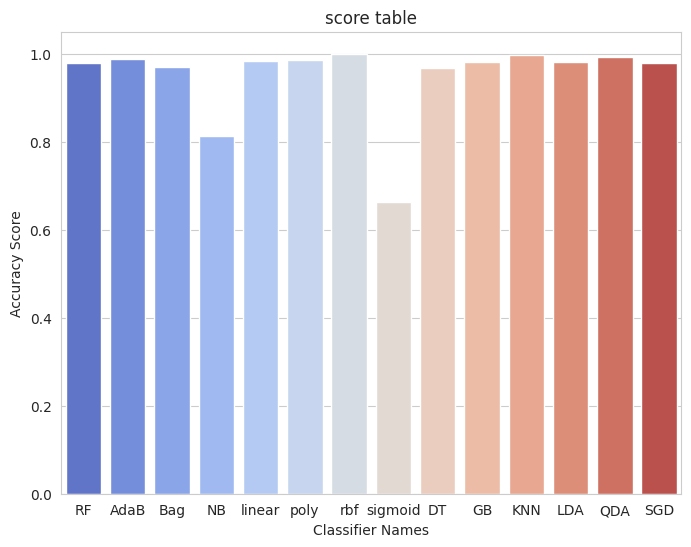

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.barplot(x = Score_names, y = All_scores, palette ='coolwarm')
plt.title('score table')
plt.xlabel('Classifier Names')
plt.ylabel('Accuracy Score')
plt.show()


In [ ]:
import numpy as np
All_Classifiers = [RF_classifier,
AdaB_classifier,
Bag_classifier,
NB_classifier,
SVC_classifiers,
DT_classifier,
GBClassifier,
KNN_classifier,
LDA_classifier,
QDA_classifier,
SGD_classifier]
All_Classifiers = np.concatenate((All_Classifiers,SVC_classifiers ))
All_Classifiers



<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


array([RandomForestClassifier(), AdaBoostClassifier(),
       BaggingClassifier(), BernoulliNB(),
       list([SVC(C=1, kernel='linear', random_state=42), SVC(C=1, kernel='poly', random_state=42), SVC(C=1, random_state=42), SVC(C=1, kernel='sigmoid', random_state=42)]),
       DecisionTreeClassifier(), GradientBoostingClassifier(),
       KNeighborsClassifier(), LinearDiscriminantAnalysis(),
       QuadraticDiscriminantAnalysis(), SGDClassifier(),
       SVC(C=1, kernel='linear', random_state=42),
       SVC(C=1, kernel='poly', random_state=42),
       SVC(C=1, random_state=42),
       SVC(C=1, kernel='sigmoid', random_state=42)], dtype=object)

# Save all models as pickle file


In [ ]:
import pickle
with open('BankNote_trained-0.1.0.pkl','wb') as f:
  pickle.dump(All_Classifiers,f)
  

In [ ]:
All_Classifiers[0].predict([[-2.4365,	3.6026,	-1.4166,	-2.8948]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import matplotlib
print(matplotlib.__version__)

3.7.1
